In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd

In [24]:
# Function to generate and plot the data
def generate_moons(N, noise):
    # Generate the data
    X, y = make_moons(n_samples=N, noise=noise, random_state=42)
    return X, y

def plot_moons(N, noise):
    # Generate the data
    X, y = generate_moons(N, noise)
    # Create a figure
    plt.figure(figsize=(10, 4))
    # Create a scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
    plt.title('Moons Data Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    # Show the plot
    plt.show()

# Create interactive widgets
N_slider = widgets.IntSlider(value=110, min=50, max=250, step=25, description='N')
noise_slider = widgets.FloatSlider(value=0.15, min=0, max=1, step=0.05, description='Noise')

# Use interact to create an interactive plot
interact(plot_moons, N=N_slider, noise=noise_slider)

# Extract dataset for future use
N_value = 110  # or any value you want
noise_value = 0.15  # or any value you want
X, y = generate_moons(N=N_value, noise=noise_value)

# Now X_final and y_final can be used for further processing outside the function


interactive(children=(IntSlider(value=110, description='N', max=250, min=50, step=25), FloatSlider(value=0.15,…

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    test_size=10)
X_train.shape, X_test.shape

((100, 2), (10, 2))

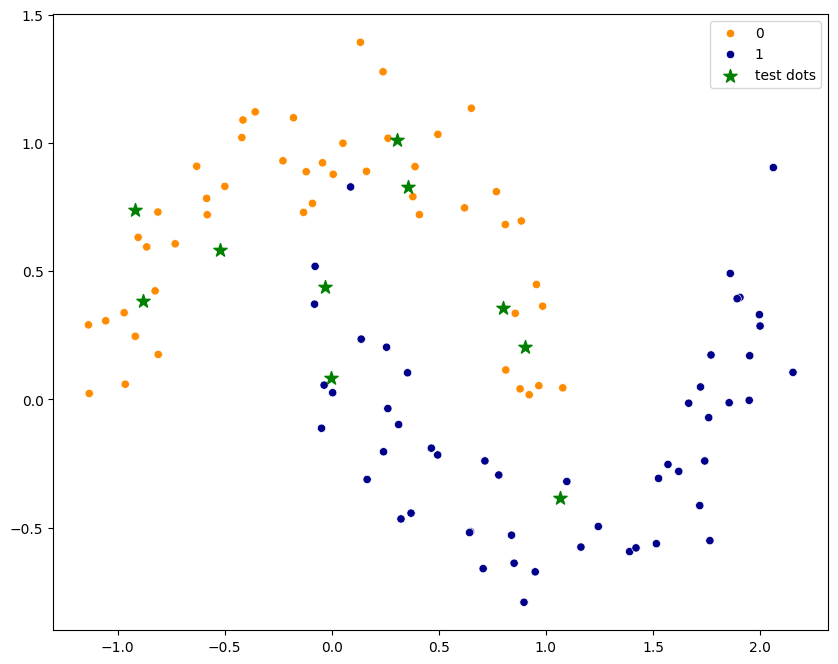

In [26]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)
plt.scatter(X_test[:, 0], X_test[:, 1],
            c='g',
            marker='*',
            s=100,
            label='test dots')
plt.legend();

In [32]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [33]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
pred_test = model.predict(X_test)
display(pred_test, y_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [44]:
idx = 0
test_dot = X_test[idx]
distances_list=[]
# Loop through the training data
for i, train_dot in enumerate(X_train):
    # Calculate the distance and store it in the list
    distances_list.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)
    })

# Convert the list of dictionaries to a DataFrame
distances = pd.DataFrame(distances_list)
distances

,train_idx,dst
0,0,2.217095
1,1,1.627919
2,2,1.958378
3,3,1.181719
4,4,1.094778
...,...,...
95,95,1.574928
96,96,2.133678
97,97,0.595949
98,98,0.404413


In [45]:
distances.sort_values('dst').head(n_neighbors)

,train_idx,dst
64,64,0.070701
67,67,0.210317
73,73,0.215314


In [46]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([64, 67, 73], dtype='int64')

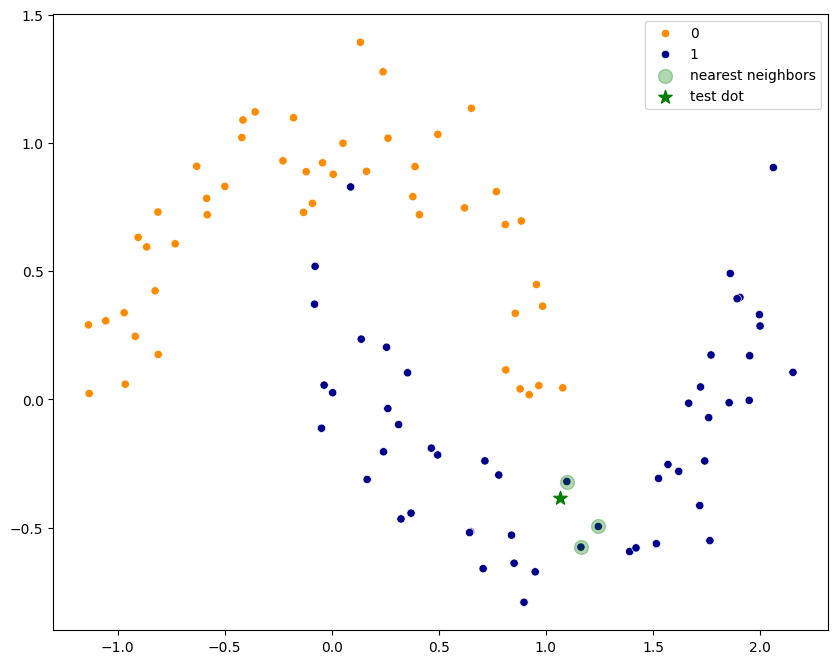

In [47]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();